# Evaluation metrics based on model type

In [1]:
from sklearn import metrics

In [2]:
metrics.__all__

['accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'ConfusionMatrixDisplay',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_tweedie_score',
 'd2_absolute_error_score',
 'd2_pinball_score',
 'dcg_score',
 'davies_bouldin_score',
 'DetCurveDisplay',
 'det_curve',
 'DistanceMetric',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'get_scorer',
 'hamming_loss',
 'hinge_loss',
 'homogeneity_completeness_v_measure',
 'homogeneity_score',
 'jaccard_score',
 'label_ranking_average_precision_score',
 'label_ranking_loss',
 'log_loss',
 'make_scorer',
 'nan_euclidean_distances',
 'matthews_corrcoef',
 'max_error',
 'mean_absolute_error',
 'mean_squared_error',
 'mean_squared_lo

## Classifiers

### Load data

In [3]:
import pandas as pd

path = '../../../data/default_credit_card/output/simplified_features.csv'
df = pd.read_csv(path)
df

,Gender,Age,Married,YearsEmployed,Income,Approved
0,1,30,1,1.25,0,1
1,0,58,1,3.04,560,1
...,...,...,...,...,...,...
688,1,17,1,0.04,750,0
689,1,35,1,8.29,0,0


### Feature selection

In [4]:
y = df['Approved']
X = df.drop(columns='Approved')

### Train test split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

### Modelling

In [6]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=100)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=100)

### Predictions

In [7]:
y_pred = model.predict_proba(X_test)
y_pred[:5]

array([[0.72277228, 0.27722772],
       [0.72277228, 0.27722772],
       [0.8203125 , 0.1796875 ],
       [0.14814815, 0.85185185],
       [0.8203125 , 0.1796875 ]])

In [8]:
y_pred_proba = y_pred[:,1]
y_pred_proba

array([0.27722772, 0.27722772, 0.1796875 , 0.85185185, 0.1796875 ,
       0.45890411, 0.1796875 , 0.45890411, 0.1796875 , 0.45890411,
       0.45890411, 0.85185185, 0.45890411, 0.45890411, 0.1796875 ,
       0.45890411, 0.85185185, 0.27722772, 0.27722772, 0.1796875 ,
       0.45890411, 0.1796875 , 0.1796875 , 0.27722772, 0.1796875 ,
       0.1796875 , 0.85185185, 0.45890411, 0.1796875 , 0.27722772,
       0.85185185, 0.85185185, 0.27722772, 0.1796875 , 0.1796875 ,
       0.85185185, 0.85185185, 0.45890411, 0.85185185, 0.85185185,
       0.1796875 , 0.45890411, 0.1796875 , 0.27722772, 0.85185185,
       0.85185185, 0.27722772, 0.45890411, 0.1796875 , 0.1796875 ,
       0.1796875 , 0.45890411, 0.1796875 , 0.45890411, 0.45890411,
       0.1796875 , 0.85185185, 0.27722772, 0.45890411, 0.45890411,
       0.45890411, 0.45890411, 0.85185185, 0.1796875 , 0.1796875 ,
       0.27722772, 0.45890411, 0.85185185, 0.45890411, 0.45890411,
       0.45890411, 0.85185185, 0.45890411, 0.45890411, 0.17968

In [9]:
y_pred = (y_pred_proba > 0.5).astype(int)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1])

In [10]:
df_pred = pd.DataFrame({
    'y_real': y_test,
    'y_pred_proba': y_pred_proba,
    'y_pred': y_pred,
})

df_pred

,y_real,y_pred_proba,y_pred
286,0,0.277228,0
511,1,0.277228,0
...,...,...,...
674,0,0.277228,0
559,1,0.851852,1


In [11]:
df_pred['comp'] = df_pred['y_real'] == df_pred['y_pred']
df_pred

,y_real,y_pred_proba,y_pred,comp
286,0,0.277228,0,True
511,1,0.277228,0,False
...,...,...,...,...
674,0,0.277228,0,True
559,1,0.851852,1,True


### Metrics

#### Accuracy

In [12]:
success = df_pred['comp'].sum()
success

141

In [13]:
total = len(df_pred)
total

207

In [14]:
success / total

0.6811594202898551

In [15]:
model.score(X_test, y_test)

0.6811594202898551

#### Confusion matrix

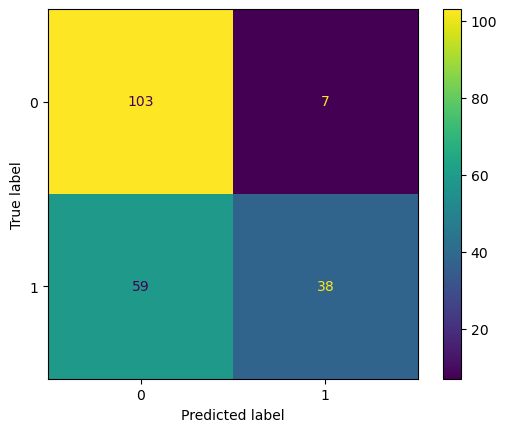

In [16]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
display = metrics.ConfusionMatrixDisplay(cm)
display.plot();

#### Classification report

In [17]:
report = metrics.classification_report(y_true=y_test, y_pred=y_pred, output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.635802,0.844444,0.681159,0.740123,0.733572
recall,0.936364,0.391753,0.681159,0.664058,0.681159
f1-score,0.757353,0.535211,0.681159,0.646282,0.653258
support,110.000000,97.000000,0.681159,207.000000,207.000000


#### ROC Curve

https://www.youtube.com/watch?v=4jRBRDbJemM

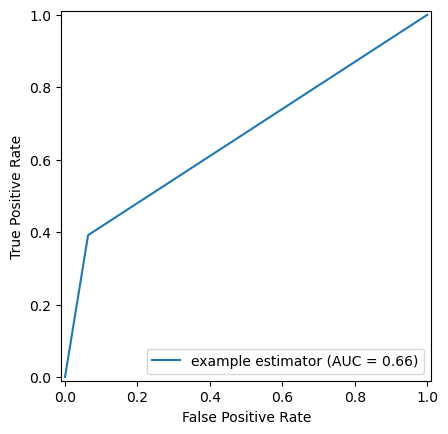

In [18]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')

display.plot();

## Regressors

### Load data

In [19]:
import pandas as pd

df = pd.read_csv('../../../data/house_perth/output/ml_simple.csv', index_col=0)
df

,PRICE,BEDROOMS,BATHROOMS,GARAGE,FLOOR_AREA,BUILD_YEAR
ADDRESS,,,,,,
1 Datchet Turn,270000,3,2,2.0,109,2011.0
1 McKenzie Corner,470000,4,2,2.0,279,2005.0
...,...,...,...,...,...,...
93 Centennial Avenue,350000,4,2,2.0,177,2005.0
98 Centennial Avenue,441000,4,2,2.0,195,2004.0


### Feature selection

In [20]:
y = df['PRICE']
X = df.drop(columns='PRICE')

### Train test split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

### Modelling

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Predictions

In [23]:
y_pred = model.predict(X_test)

df_pred = pd.DataFrame({
    'y_real': y_test,
    'y_pred': y_pred,
})

df_pred

,y_real,y_pred
ADDRESS,,
117 Millbrook Avenue,305000,287306.988737
10 Yelka Way,460000,424269.757503
...,...,...
26 Keyham Street,400000,382523.037292
7 Millom Way,360000,288644.595117


In [24]:
df_pred['error'] = df_pred['y_real'] - df_pred['y_pred']
df_pred

,y_real,y_pred,error
ADDRESS,,,
117 Millbrook Avenue,305000,287306.988737,17693.011263
10 Yelka Way,460000,424269.757503,35730.242497
...,...,...,...
26 Keyham Street,400000,382523.037292,17476.962708
7 Millom Way,360000,288644.595117,71355.404883


In [25]:
df_pred['error2'] = df_pred['error']**2
df_pred

,y_real,y_pred,error,error2
ADDRESS,,,,
117 Millbrook Avenue,305000,287306.988737,17693.011263,3.130426e+08
10 Yelka Way,460000,424269.757503,35730.242497,1.276650e+09
...,...,...,...,...
26 Keyham Street,400000,382523.037292,17476.962708,3.054442e+08
7 Millom Way,360000,288644.595117,71355.404883,5.091594e+09


### Metrics

#### MSE: Mean Squared Error

In [26]:
MSE = df_pred.error2.mean()
MSE

1164969171.5051486

In [27]:
metrics.mean_squared_error(y_test, y_pred)

1164969171.5051486

#### RMSE: Root Mean Squared Error

In [28]:
import numpy as np

RMSE = np.sqrt(MSE)
RMSE

34131.644723118

In [29]:
metrics.root_mean_squared_error(y_test, y_pred)

34131.644723118

#### R-Squared

In [30]:
error = y_test - y_test.mean()
error2 = error**2
error2

ADDRESS
117 Millbrook Avenue    6.147066e+09
10 Yelka Way            5.867066e+09
                            ...     
26 Keyham Street        2.754529e+08
7 Millom Way            5.477110e+08
Name: PRICE, Length: 62, dtype: float64

In [31]:
MSE_Y = error2.mean()
MSE_Y

3047119667.0135283

In [32]:
FAIL = MSE / MSE_Y
FAIL

0.38231815577066947

In [33]:
1 - FAIL

0.6176818442293306

In [34]:
model.score(X_test, y_test)

0.6176818442293306

#### MAE: Mean Absolute Error

In [35]:
df_pred['error'].abs().mean()

25889.86600654045

In [36]:
metrics.mean_absolute_error(y_test, y_pred)

25889.86600654045